### 1. Read the case, department, and source data into their own spark dataframes.

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

spark = SparkSession.builder.getOrCreate()

In [2]:
case_df = spark.read.csv("case.csv", sep=",", header=True, inferSchema=True)
dept_df = spark.read.csv("dept.csv", sep=",", header=True, inferSchema=True)
source_df = spark.read.csv("source.csv", sep=",", header=True, inferSchema=True)

In [3]:
case_df.show(2, vertical=True)

-RECORD 0------------------------------------
 case_id              | 1014127332           
 case_opened_date     | 1/1/18 0:42          
 case_closed_date     | 1/1/18 12:29         
 SLA_due_date         | 9/26/20 0:42         
 case_late            | NO                   
 num_days_late        | -998.5087616000001   
 case_closed          | YES                  
 dept_division        | Field Operations     
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 source_id            | svcCRMLS             
 request_address      | 2315  EL PASO ST,... 
 council_district     | 5                    
-RECORD 1------------------------------------
 case_id              | 1014127333           
 case_opened_date     | 1/1/18 0:46          
 case_closed_date     | 1/3/18 8:11          
 SLA_due_date         | 1/5/18 8:30          
 case_late            | NO                   
 num_days_late        | -2.0126041

In [4]:
dept_df.show(2, vertical=True)

-RECORD 0--------------------------------------
 dept_division          | 311 Call Center      
 dept_name              | Customer Service     
 standardized_dept_name | Customer Service     
 dept_subject_to_SLA    | YES                  
-RECORD 1--------------------------------------
 dept_division          | Brush                
 dept_name              | Solid Waste Manag... 
 standardized_dept_name | Solid Waste          
 dept_subject_to_SLA    | YES                  
only showing top 2 rows



In [5]:
source_df.show(2, vertical=True)

-RECORD 0---------------------------
 source_id       | 100137           
 source_username | Merlene Blodgett 
-RECORD 1---------------------------
 source_id       | 103582           
 source_username | Carmen Cura      
only showing top 2 rows



### 2. Write the code necessary to store the source data in both csv and json format, store these as sources_csv and sources_json

In [6]:
(
    source_df.write.format("csv")
    .mode("overwrite")
    .option("header", "true")
    .save("sources_csv")
)

(
    source_df.write.format("json")
    .mode("overwrite")
    .option("header", "true")
    .save("sources_json")
)

Inspect your folder structure. What do you notice?

> There are 3 files: 1 hidden, one that is an empty text file named \_SUCCESS, and then the actual json/csv file i made. The name I gave it in the code became the name of the folder, and the json/csv file name itself is basically gibberish.

### 3. Inspect the data in your dataframes. Are the data types appropriate? Write the code necessary to cast the values to the appropriate types.

In [7]:
case_df.show(2, vertical=True)

-RECORD 0------------------------------------
 case_id              | 1014127332           
 case_opened_date     | 1/1/18 0:42          
 case_closed_date     | 1/1/18 12:29         
 SLA_due_date         | 9/26/20 0:42         
 case_late            | NO                   
 num_days_late        | -998.5087616000001   
 case_closed          | YES                  
 dept_division        | Field Operations     
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 source_id            | svcCRMLS             
 request_address      | 2315  EL PASO ST,... 
 council_district     | 5                    
-RECORD 1------------------------------------
 case_id              | 1014127333           
 case_opened_date     | 1/1/18 0:46          
 case_closed_date     | 1/3/18 8:11          
 SLA_due_date         | 1/5/18 8:30          
 case_late            | NO                   
 num_days_late        | -2.0126041

In [8]:
case_df.printSchema()

root
 |-- case_id: integer (nullable = true)
 |-- case_opened_date: string (nullable = true)
 |-- case_closed_date: string (nullable = true)
 |-- SLA_due_date: string (nullable = true)
 |-- case_late: string (nullable = true)
 |-- num_days_late: double (nullable = true)
 |-- case_closed: string (nullable = true)
 |-- dept_division: string (nullable = true)
 |-- service_request_type: string (nullable = true)
 |-- SLA_days: double (nullable = true)
 |-- case_status: string (nullable = true)
 |-- source_id: string (nullable = true)
 |-- request_address: string (nullable = true)
 |-- council_district: integer (nullable = true)



In [9]:
#1 SLA_due_date shuld be renamed to case_due_date
#2 council_district should be string
#3 case_opened_date, case_closed_date, SLA_due_date should be datetime
#4 case_late, case_closed should be boolean 

case_df = (case_df
           .withColumnRenamed('SLA_due_date', 'case_due_date')  #1
           .withColumn('case_late', col('case_late') == 'YES')  #4
           .withColumn('case_closed', col('case_closed') == 'YES')  #4
           .withColumn('council_district', format_string('%04d', col('council_district')))  #2
           .withColumn('case_opened_date', to_timestamp(col('case_opened_date'), 'M/d/yy H:mm'))  #3
           .withColumn('case_closed_date', to_timestamp(col('case_closed_date'), 'M/d/yy H:mm'))  #3
           .withColumn('case_due_date', to_timestamp(col('case_due_date'), 'M/d/yy H:mm'))  #3
          )

case_df.show(2, vertical=True)

-RECORD 0------------------------------------
 case_id              | 1014127332           
 case_opened_date     | 2018-01-01 00:42:00  
 case_closed_date     | 2018-01-01 12:29:00  
 case_due_date        | 2020-09-26 00:42:00  
 case_late            | false                
 num_days_late        | -998.5087616000001   
 case_closed          | true                 
 dept_division        | Field Operations     
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 source_id            | svcCRMLS             
 request_address      | 2315  EL PASO ST,... 
 council_district     | 0005                 
-RECORD 1------------------------------------
 case_id              | 1014127333           
 case_opened_date     | 2018-01-01 00:46:00  
 case_closed_date     | 2018-01-03 08:11:00  
 case_due_date        | 2018-01-05 08:30:00  
 case_late            | false                
 num_days_late        | -2.0126041

In [10]:
dept_df.show(2, vertical=True)

-RECORD 0--------------------------------------
 dept_division          | 311 Call Center      
 dept_name              | Customer Service     
 standardized_dept_name | Customer Service     
 dept_subject_to_SLA    | YES                  
-RECORD 1--------------------------------------
 dept_division          | Brush                
 dept_name              | Solid Waste Manag... 
 standardized_dept_name | Solid Waste          
 dept_subject_to_SLA    | YES                  
only showing top 2 rows



In [11]:
dept_df.printSchema()

root
 |-- dept_division: string (nullable = true)
 |-- dept_name: string (nullable = true)
 |-- standardized_dept_name: string (nullable = true)
 |-- dept_subject_to_SLA: string (nullable = true)



In [12]:
# dept_subject_to_SLA should be boolean 
dept_df = (dept_df.withColumn('dept_subject_to_SLA', col('dept_subject_to_SLA') == 'YES'))

dept_df.show(2, vertical=True)

-RECORD 0--------------------------------------
 dept_division          | 311 Call Center      
 dept_name              | Customer Service     
 standardized_dept_name | Customer Service     
 dept_subject_to_SLA    | true                 
-RECORD 1--------------------------------------
 dept_division          | Brush                
 dept_name              | Solid Waste Manag... 
 standardized_dept_name | Solid Waste          
 dept_subject_to_SLA    | true                 
only showing top 2 rows



In [13]:
source_df.show(2, vertical=True)

-RECORD 0---------------------------
 source_id       | 100137           
 source_username | Merlene Blodgett 
-RECORD 1---------------------------
 source_id       | 103582           
 source_username | Carmen Cura      
only showing top 2 rows



In [14]:
source_df.printSchema()

root
 |-- source_id: string (nullable = true)
 |-- source_username: string (nullable = true)



In [15]:
# this df is fine as is

You might have noticed that the latest date in the dataset is fairly far off from the present day. To account for this, replace any occurances of the current time with the maximum date from the dataset.

In [16]:
# what is max date in dataset?
(case_df
    .select(max('case_closed_date'), max('case_opened_date'), max('case_due_date'))
).show()

+---------------------+---------------------+-------------------+
|max(case_closed_date)|max(case_opened_date)| max(case_due_date)|
+---------------------+---------------------+-------------------+
|  2018-08-08 10:38:00|  2018-08-08 10:38:00|2022-05-27 15:07:00|
+---------------------+---------------------+-------------------+



### 1. How old is the latest (in terms of days past SLA) currently open issue? How long has the oldest (in terms of days since opened) currently opened issue been open?

In [17]:
(
    case_df
    .filter(col('case_status') == 'Open')
    .select(max('num_days_late'))
).show()

+------------------+
|max(num_days_late)|
+------------------+
|       348.6458333|
+------------------+



In [18]:
(
    case_df
    .filter(col('case_status') == 'Open')
    .select(max('case_closed_date'))
).show()

+---------------------+
|max(case_closed_date)|
+---------------------+
|                 null|
+---------------------+



In [19]:
# assuming today is the same as max date in dataset
max_date = case_df.select(max('case_closed_date')).collect()[0][0]

case_df = (case_df
           .withColumn('case_age', datediff(lit(max_date), 'case_opened_date'))
           .withColumn('days_to_closed', datediff('case_closed_date', 'case_opened_date'))
           .withColumn('case_lifetime', 
                       when(expr('! case_closed'), col('case_age'))
                       .otherwise(col('days_to_closed')))
          )

case_df.where(expr("case_closed")).show(2, vertical=True)
case_df.where(expr("! case_closed")).show(2, vertical=True)

-RECORD 0------------------------------------
 case_id              | 1014127332           
 case_opened_date     | 2018-01-01 00:42:00  
 case_closed_date     | 2018-01-01 12:29:00  
 case_due_date        | 2020-09-26 00:42:00  
 case_late            | false                
 num_days_late        | -998.5087616000001   
 case_closed          | true                 
 dept_division        | Field Operations     
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 source_id            | svcCRMLS             
 request_address      | 2315  EL PASO ST,... 
 council_district     | 0005                 
 case_age             | 219                  
 days_to_closed       | 0                    
 case_lifetime        | 0                    
-RECORD 1------------------------------------
 case_id              | 1014127333           
 case_opened_date     | 2018-01-01 00:46:00  
 case_closed_date     | 2018-01-03

### 2. How many Stray Animal cases are there?


In [20]:
(case_df
    .groupBy('service_request_type')
    .count()
    .where(case_df.service_request_type == 'Stray Animal')
).show()

+--------------------+-----+
|service_request_type|count|
+--------------------+-----+
|        Stray Animal|26760|
+--------------------+-----+



### 3. How many service requests that are assigned to the Field Operations department (dept_division) are not classified as "Officer Standby" request type (service_request_type)?

In [21]:
(
    case_df
    .filter(col('dept_division') == 'Field Operations')
    .filter(col('service_request_type') != 'Officer Standby')
    .count()
)

113902

### 4. Convert the council_district column to a string column.

In [22]:
case_df = case_df.withColumn("council_district", col("council_district").cast("string"))
case_df.show(2, vertical=True)

-RECORD 0------------------------------------
 case_id              | 1014127332           
 case_opened_date     | 2018-01-01 00:42:00  
 case_closed_date     | 2018-01-01 12:29:00  
 case_due_date        | 2020-09-26 00:42:00  
 case_late            | false                
 num_days_late        | -998.5087616000001   
 case_closed          | true                 
 dept_division        | Field Operations     
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 source_id            | svcCRMLS             
 request_address      | 2315  EL PASO ST,... 
 council_district     | 0005                 
 case_age             | 219                  
 days_to_closed       | 0                    
 case_lifetime        | 0                    
-RECORD 1------------------------------------
 case_id              | 1014127333           
 case_opened_date     | 2018-01-01 00:46:00  
 case_closed_date     | 2018-01-03

### 5. Extract the year from the case_closed_date column.

In [23]:
case_df = case_df.withColumn("year", year("case_closed_date"))
case_df.show(2, vertical=True)

-RECORD 0------------------------------------
 case_id              | 1014127332           
 case_opened_date     | 2018-01-01 00:42:00  
 case_closed_date     | 2018-01-01 12:29:00  
 case_due_date        | 2020-09-26 00:42:00  
 case_late            | false                
 num_days_late        | -998.5087616000001   
 case_closed          | true                 
 dept_division        | Field Operations     
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 source_id            | svcCRMLS             
 request_address      | 2315  EL PASO ST,... 
 council_district     | 0005                 
 case_age             | 219                  
 days_to_closed       | 0                    
 case_lifetime        | 0                    
 year                 | 2018                 
-RECORD 1------------------------------------
 case_id              | 1014127333           
 case_opened_date     | 2018-01-01

### 6. Convert num_days_late from days to hours in new columns num_hours_late.

In [24]:
case_df = case_df.withColumn(
    "num_hours_late", 
    (round((col('num_days_late') * 24), 4))
)
    
case_df.show(2, vertical=True)

-RECORD 0------------------------------------
 case_id              | 1014127332           
 case_opened_date     | 2018-01-01 00:42:00  
 case_closed_date     | 2018-01-01 12:29:00  
 case_due_date        | 2020-09-26 00:42:00  
 case_late            | false                
 num_days_late        | -998.5087616000001   
 case_closed          | true                 
 dept_division        | Field Operations     
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 source_id            | svcCRMLS             
 request_address      | 2315  EL PASO ST,... 
 council_district     | 0005                 
 case_age             | 219                  
 days_to_closed       | 0                    
 case_lifetime        | 0                    
 year                 | 2018                 
 num_hours_late       | -23964.2103          
-RECORD 1------------------------------------
 case_id              | 1014127333

### 7. Join the case data with the source and department data.

In [25]:
case_df = (
    case_df
    .join(dept_df, "dept_division", "left")
    .join(source_df, 'source_id', 'left')
)

case_df.show(2, vertical=True)

-RECORD 0--------------------------------------
 source_id              | svcCRMLS             
 dept_division          | Field Operations     
 case_id                | 1014127332           
 case_opened_date       | 2018-01-01 00:42:00  
 case_closed_date       | 2018-01-01 12:29:00  
 case_due_date          | 2020-09-26 00:42:00  
 case_late              | false                
 num_days_late          | -998.5087616000001   
 case_closed            | true                 
 service_request_type   | Stray Animal         
 SLA_days               | 999.0                
 case_status            | Closed               
 request_address        | 2315  EL PASO ST,... 
 council_district       | 0005                 
 case_age               | 219                  
 days_to_closed         | 0                    
 case_lifetime          | 0                    
 year                   | 2018                 
 num_hours_late         | -23964.2103          
 dept_name              | Animal Care Se

In [26]:
case_df = (
    case_df
    .drop(case_df.dept_name)
    .withColumnRenamed("standardized_dept_name", "department")
)

case_df.show(2, vertical=True)

-RECORD 0------------------------------------
 source_id            | svcCRMLS             
 dept_division        | Field Operations     
 case_id              | 1014127332           
 case_opened_date     | 2018-01-01 00:42:00  
 case_closed_date     | 2018-01-01 12:29:00  
 case_due_date        | 2020-09-26 00:42:00  
 case_late            | false                
 num_days_late        | -998.5087616000001   
 case_closed          | true                 
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 request_address      | 2315  EL PASO ST,... 
 council_district     | 0005                 
 case_age             | 219                  
 days_to_closed       | 0                    
 case_lifetime        | 0                    
 year                 | 2018                 
 num_hours_late       | -23964.2103          
 department           | Animal Care Services 
 dept_subject_to_SLA  | true      

### 8. Are there any cases that do not have a request source?

In [27]:
(case_df.filter(col('source_id') == 'null')).show()

+---------+-------------+-------+----------------+----------------+-------------+---------+-------------+-----------+--------------------+--------+-----------+---------------+----------------+--------+--------------+-------------+----+--------------+----------+-------------------+---------------+
|source_id|dept_division|case_id|case_opened_date|case_closed_date|case_due_date|case_late|num_days_late|case_closed|service_request_type|SLA_days|case_status|request_address|council_district|case_age|days_to_closed|case_lifetime|year|num_hours_late|department|dept_subject_to_SLA|source_username|
+---------+-------------+-------+----------------+----------------+-------------+---------+-------------+-----------+--------------------+--------+-----------+---------------+----------------+--------+--------------+-------------+----+--------------+----------+-------------------+---------------+
+---------+-------------+-------+----------------+----------------+-------------+---------+-------------+-

### 9. What are the top 10 service request types in terms of number of requests?

In [28]:
(case_df.groupBy('service_request_type').count().sort(desc('count'))).show(10)

+--------------------+-----+
|service_request_type|count|
+--------------------+-----+
|           No Pickup|89210|
|Overgrown Yard/Trash|66403|
|        Bandit Signs|32968|
|        Damaged Cart|31163|
|Front Or Side Yar...|28920|
|        Stray Animal|27361|
|Aggressive Animal...|25492|
|Cart Exchange Req...|22608|
|Junk Vehicle On P...|21649|
|     Pot Hole Repair|20827|
+--------------------+-----+
only showing top 10 rows



### 10. What are the top 10 service request types in terms of average days late?

In [29]:
(
    case_df
    .groupBy('service_request_type')
    .agg(avg('num_days_late'))
    .sort(desc('avg(num_days_late)'))
).show(10)

+--------------------+------------------+
|service_request_type|avg(num_days_late)|
+--------------------+------------------+
|  Zoning: Junk Yards| 175.9563621042095|
|Labeling for Used...|162.43032902285717|
|Record Keeping of...|153.99724039428568|
|Signage Requied f...|151.63868055333333|
|Storage of Used M...|     142.112556415|
|Zoning: Recycle Yard|135.92851612479797|
|Donation Containe...|131.75610506358706|
|License Requied U...|128.79828704142858|
|Traffic Signal Gr...|101.79846062200002|
|           Complaint| 72.87050230311695|
+--------------------+------------------+
only showing top 10 rows



### 11. Does number of days late depend on department?

In [30]:
(
    case_df
    .filter('case_late')
    .groupby('department')
    .agg(mean('num_days_late').alias('days_late'), count('num_days_late').alias('n_cases_late'))
    .sort('days_late')
    .withColumn('days_late', round(col('days_late'), 1))
    .show(truncate=False)
)

+------------------------+---------+------------+
|department              |days_late|n_cases_late|
+------------------------+---------+------------+
|Metro Health            |6.5      |854         |
|Solid Waste             |7.1      |33729       |
|Trans & Cap Improvements|10.7     |5529        |
|Parks & Recreation      |22.4     |3810        |
|Animal Care Services    |23.4     |23751       |
|DSD/Code Enforcement    |49.5     |26439       |
|Customer Service        |88.2     |2035        |
+------------------------+---------+------------+



### 12. How do number of days late depend on department and request type?

In [31]:
(
    case_df
    .filter("case_closed")
    .filter("case_late")
    .groupby("department", "service_request_type")
    .agg(avg("num_days_late").alias("days_late"), count("*").alias("n_cases"))
    .withColumn("days_late", round(col("days_late"), 1))
    .sort(desc("days_late"))
    .show(40, truncate=False)
)

+--------------------+--------------------------------------------+---------+-------+
|department          |service_request_type                        |days_late|n_cases|
+--------------------+--------------------------------------------+---------+-------+
|DSD/Code Enforcement|Zoning: Recycle Yard                        |273.6    |75     |
|DSD/Code Enforcement|Zoning: Junk Yards                          |251.9    |146    |
|DSD/Code Enforcement|Donation Container Enforcement              |201.7    |82     |
|DSD/Code Enforcement|Structure/Housing Maintenance               |182.4    |30     |
|DSD/Code Enforcement|Graffiti: Private Property (Corridors)      |175.1    |3      |
|DSD/Code Enforcement|Storage of Used Mattress                    |164.0    |7      |
|DSD/Code Enforcement|Labeling for Used Mattress                  |162.4    |7      |
|DSD/Code Enforcement|Record Keeping of Used Mattresses           |154.0    |7      |
|DSD/Code Enforcement|Signage Requied for Sale of Used

#### Notes

In [32]:
# code to auto format code in terminal
# pbpaste | black -q- | pbcopy
# made an alias called fmt-clipboard


# to format a whole py file
# in the terminal & directory where the file is
# black some_py_file.py

In [33]:
(case_df.filter("case_closed").filter("case_late").groupby("department", "service_request_type").agg(avg("num_days_late").alias("days_late"), count("*").alias("n_cases"))
    .withColumn("days_late", round(col("days_late"), 1)).sort(desc("days_late")).show(40, truncate=False)
)

# after using fmt-clipboard in terminal:
(
    case_df.filter("case_closed")
    .filter("case_late")
    .groupby("department", "service_request_type")
    .agg(avg("num_days_late").alias("days_late"), count("*").alias("n_cases"))
    .withColumn("days_late", round(col("days_late"), 1))
    .sort(desc("days_late"))
    .show(40, truncate=False)
)


+--------------------+--------------------------------------------+---------+-------+
|department          |service_request_type                        |days_late|n_cases|
+--------------------+--------------------------------------------+---------+-------+
|DSD/Code Enforcement|Zoning: Recycle Yard                        |273.6    |75     |
|DSD/Code Enforcement|Zoning: Junk Yards                          |251.9    |146    |
|DSD/Code Enforcement|Donation Container Enforcement              |201.7    |82     |
|DSD/Code Enforcement|Structure/Housing Maintenance               |182.4    |30     |
|DSD/Code Enforcement|Graffiti: Private Property (Corridors)      |175.1    |3      |
|DSD/Code Enforcement|Storage of Used Mattress                    |164.0    |7      |
|DSD/Code Enforcement|Labeling for Used Mattress                  |162.4    |7      |
|DSD/Code Enforcement|Record Keeping of Used Mattresses           |154.0    |7      |
|DSD/Code Enforcement|Signage Requied for Sale of Used

# Explore Exercises

### 1. How many different cases are there, by department?

In [36]:
(case_df.groupby('department')
 .count()
 .toPandas()
 .set_index('department')
 ['count']
 .sort_values()
)

department
City Council                    34
Customer Service              2889
Metro Health                  5313
Parks & Recreation           19964
Trans & Cap Improvements     97841
Animal Care Services        119362
Solid Waste                 286287
DSD/Code Enforcement        323579
Name: count, dtype: int64

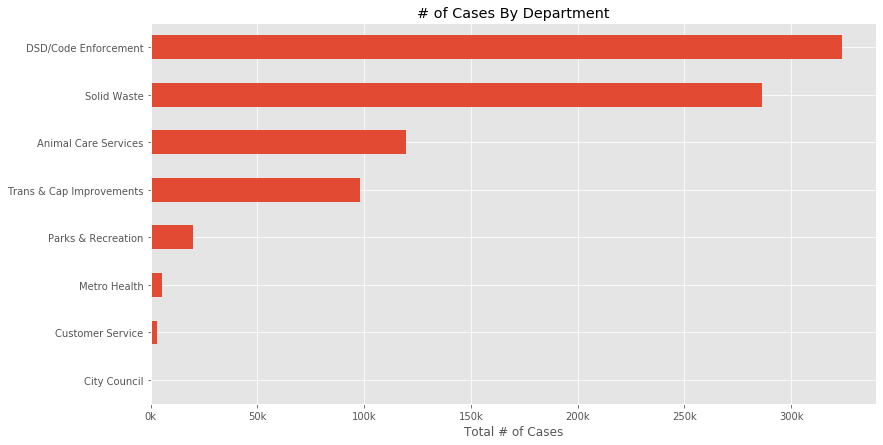

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.ion()
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=14)
plt.style.use('ggplot')

def format_number(x, *args):
    return '{:.0f}k'.format(x / 1000)

(case_df.groupby('department')
 .count()
 .toPandas()
 .set_index('department')
 ['count']
 .sort_values()
 .plot.barh()
)
plt.gca().set(ylabel='', xlabel='Total # of Cases', title='# of Cases By Department')
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number))

### 2. Does the percentage of cases that are late vary by department?

[Text(0, 0.5, ''),
 Text(0.5, 0, '% of Cases Closed After Due Date'),
 Text(0.5, 1.0, '% of Late Cases By Department')]

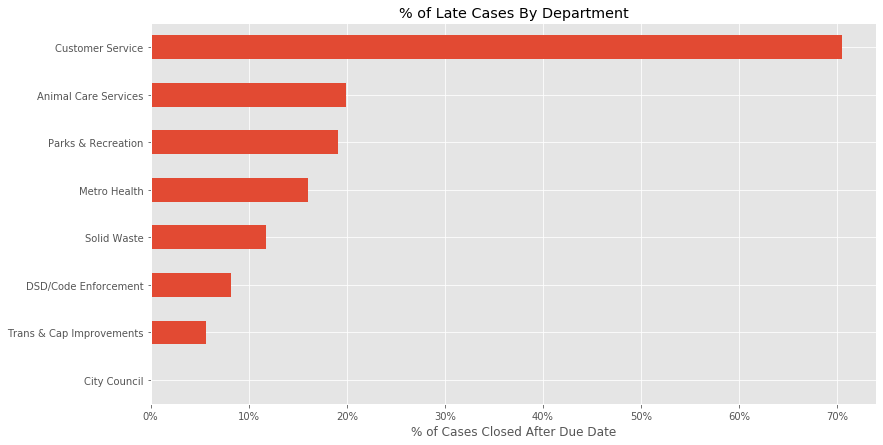

In [38]:
(case_df.withColumn('case_late', col('case_late').cast('int'))
 .groupby('department')
 .agg(avg('case_late').alias('p_cases_late'))
 .toPandas()
 .set_index('department')
 .p_cases_late
 .sort_values()
 .plot.barh()
)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
plt.gca().set(ylabel='', xlabel='% of Cases Closed After Due Date', title='% of Late Cases By Department')

### 3. On average, how late are the late cases by department?

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Avg # of Days Late'),
 Text(0.5, 1.0, 'How late are the late cases?')]

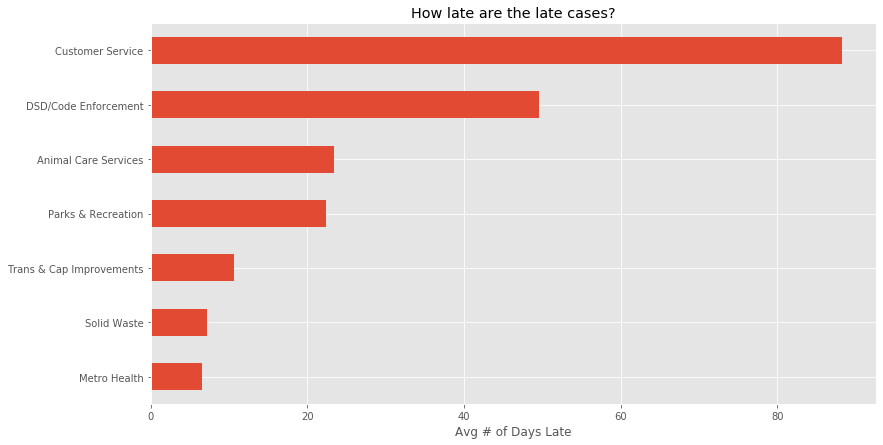

In [40]:
(case_df.filter('case_late')
 .groupby('department')
 .agg(avg('num_days_late').alias('avg_days_late'))
 .toPandas()
 .set_index('department')
 .avg_days_late
 .sort_values()
 .plot.barh()
)
plt.gca().set(ylabel='', xlabel='Avg # of Days Late', title='How late are the late cases?')

### 4. What is the service type that is the most late? Just for Parks & Rec?

[Text(0, 0.5, ''),
 Text(0.5, 0, '# of Days Late'),
 Text(0.5, 1.0, 'Most Late Cases For Parks & Recreation')]

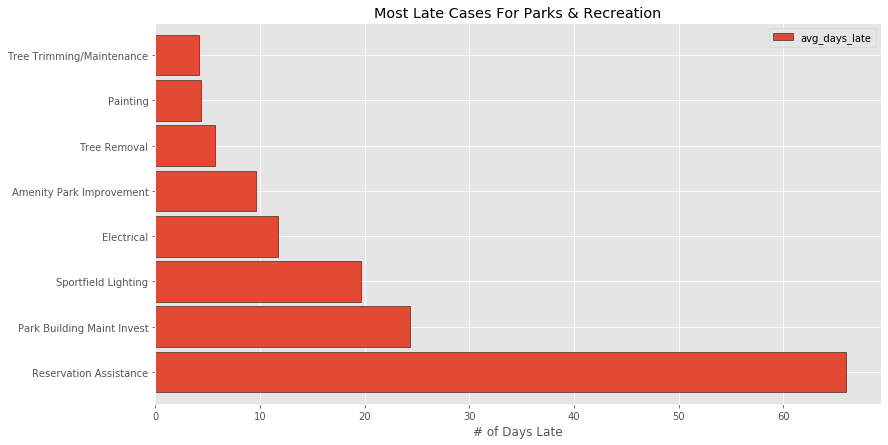

In [41]:
(case_df.filter(case_df.department == 'Parks & Recreation')
 .groupby('service_request_type')
 .agg(mean('num_days_late').alias('avg_days_late'))
 .sort(desc('avg_days_late'))
 .limit(8) # limit in spark, not pandas
 .toPandas()
 .set_index('service_request_type')
 .plot.barh(ec='black', width=.9)
)
plt.gca().set(title='Most Late Cases For Parks & Recreation', xlabel='# of Days Late', ylabel='')

### 5. For the DSD/Code Enforcement department, what are the most common service request types? Look at other departments too.

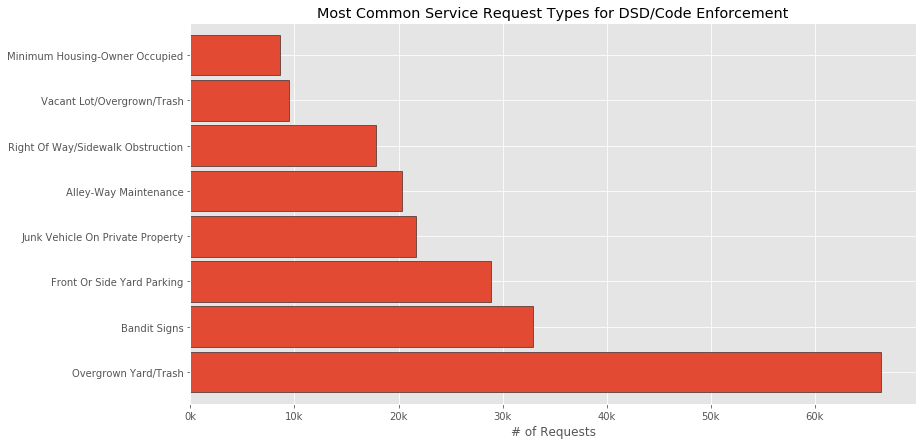

In [43]:
(case_df.filter(expr('department == "DSD/Code Enforcement"'))
 .groupby('service_request_type')
 .count()
 .sort(desc('count'))
 .limit(8)
 .toPandas()
 .set_index('service_request_type')
 ['count']
 .plot.barh(width=.9, ec='black')
)
plt.gca().set(ylabel='', xlabel='# of Requests', title='Most Common Service Request Types for DSD/Code Enforcement')
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number))

### 6. Does whether or not its a weekend matter for when a case is opened/closed?

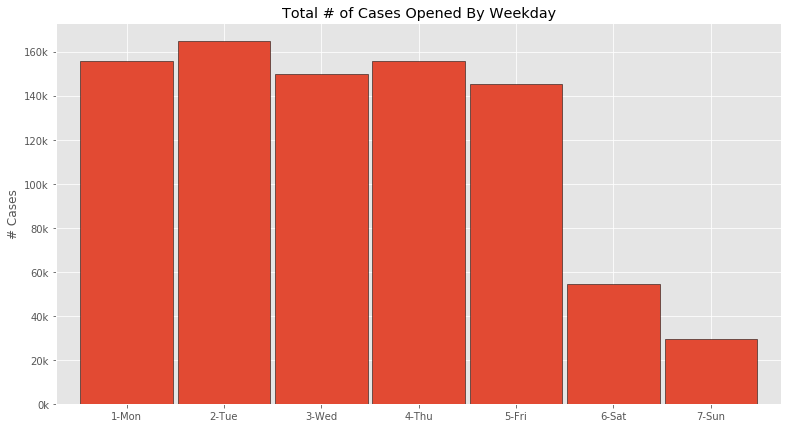

In [45]:
(case_df.withColumn('weekday', date_format('case_opened_date', 'u-E'))
 .groupby('weekday')
 .count()
 .na.drop()
 .toPandas()
 .set_index('weekday')
 ['count']
 .sort_index()
 .plot.bar(width=.95, ec='black')
)
plt.xticks(rotation=0)
plt.gca().set(xlabel='', ylabel='# Cases', title='Total # of Cases Opened By Weekday')
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number))

### 7. On average, how many cases are opened a day for the Customer Service department?

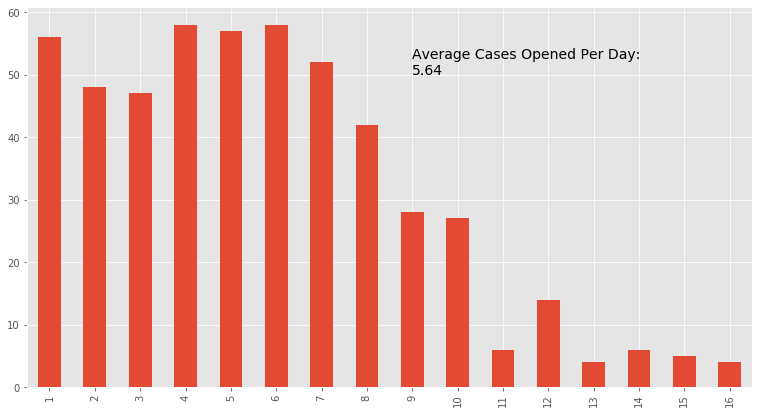

In [46]:
def plot_cases(df):
    s = df['count']
    avg = s.mean()
    s.value_counts().sort_index().plot.bar()
    plt.text(8, 50, f'Average Cases Opened Per Day:\n{avg:.2f}', ha='left', size=14)


(case_df.withColumn('case_opened_date', expr('date(case_opened_date)'))
 .filter(case_df.department == 'Customer Service')
 .groupby('case_opened_date')
 .count()
 .toPandas()
 .pipe(plot_cases)
)

### 8. Does the number of service requests for the solid waste department vary by day of the week?

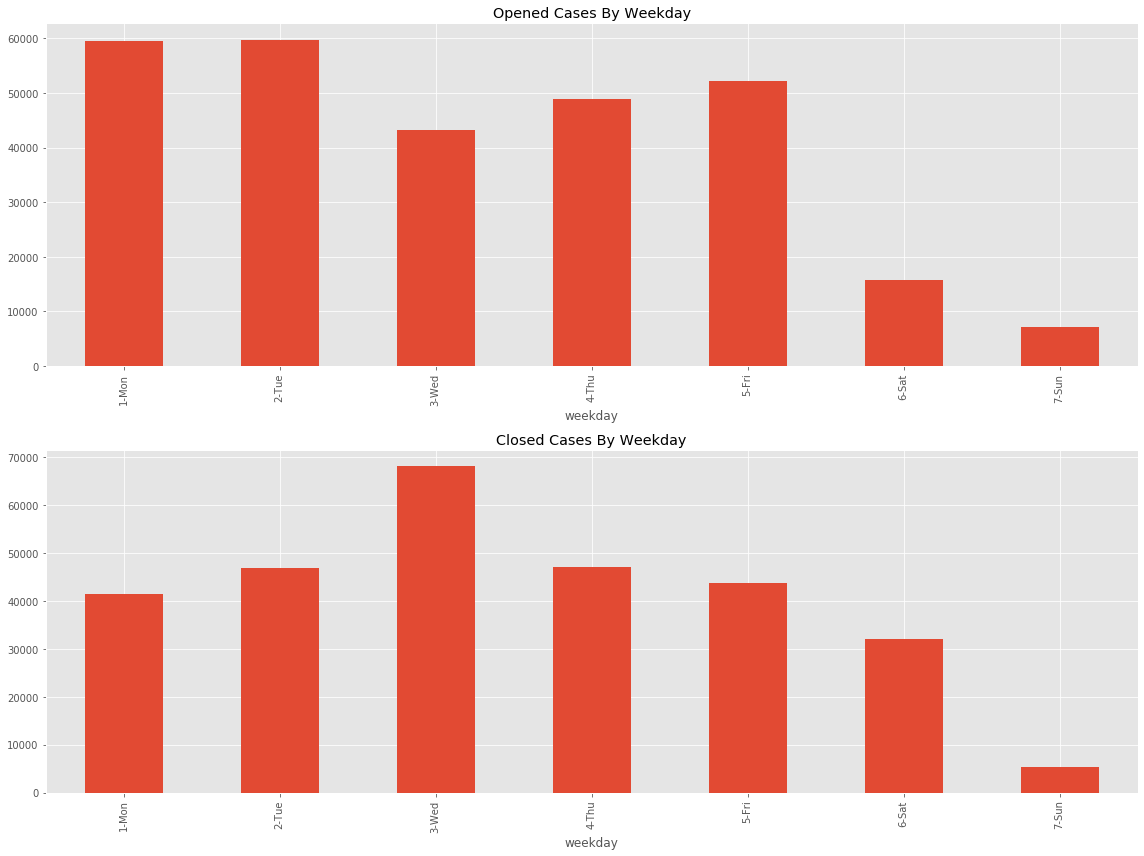

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

(
    case_df.withColumn("weekday", date_format("case_opened_date", "u-E"))
    .filter(expr('department == "Solid Waste"'))
    .groupby("weekday")
    .count()
    .na.drop()
    .toPandas()
    .set_index('weekday')['count']
    .sort_index()
    .plot.bar(ax=ax1)
)
ax1.set(
    title='Opened Cases By Weekday'
)
plt.xticks(rotation=0)

(
    case_df.withColumn("weekday", date_format("case_closed_date", "u-E"))
    .filter(expr('department == "Solid Waste"'))
    .groupby("weekday")
    .count()
    .na.drop()
    .toPandas()
    .set_index('weekday')['count']
    .sort_index()
    .plot.bar(ax=ax2)
)
ax2.set(
    title='Closed Cases By Weekday'
)
fig.tight_layout()